# Creating a mesa agent-based model for analyzing stress and strain distribution in buildings under various load conditions involves simulating the behavior of individual agents (representing structural elements or components of the building) and their interactions within the system. Here's a general outline of how you might approach building such a model using the Mesa library in Python:

***Define Agents:*** Each agent represents a structural component of the building, such as beams, columns, or floors. These agents should have attributes such as material properties, dimensions, current stress/strain levels, and connectivity to neighboring agents.

***Define Environment:*** Create a grid-based environment representing the building structure. Agents occupy cells in this grid, and the interactions between agents are based on their spatial relationships.

***Define Rules for Interaction:*** Specify how agents interact with each other and respond to external forces (loads). This could involve rules for transferring stress/strain between neighboring agents, responding to changes in load conditions, and updating their internal state accordingly.

***Implement Load Conditions:*** Introduce different load conditions (e.g., static loads, dynamic loads, seismic events) and simulate their effects on the building structure over time.

***Visualization:*** Use visualization tools to display the stress and strain distribution within the building at each time step, allowing for real-time analysis of structural behavior.

In [ ]:
pip install mesa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from mesa import Agent, Model
from mesa.space import MultiGrid
from mesa.time import SimultaneousActivation
from mesa.datacollection import DataCollector
import numpy as np

class StructuralAgent(Agent):
    def __init__(self, unique_id, model, material_properties, dimensions):
        super().__init__(unique_id, model)
        self.material_properties = material_properties
        self.dimensions = dimensions
        self.stress = 0
        self.strain = 0

    def step(self):
        # Placeholder calculations for demonstration
        # You need to replace these with actual calculations
        self.stress = np.random.uniform(0, 10)
        self.strain = self.stress / 2  # Simple linear relationship for demonstration

class StructuralModel(Model):
    def __init__(self, width, height, material_properties, dimensions):
        super().__init__()
        self.grid = MultiGrid(width, height, True)
        self.schedule = SimultaneousActivation(self)
        self.material_properties = material_properties
        self.dimensions = dimensions

        # Create agents representing structural components
        for x in range(width):
            for y in range(height):
                agent = StructuralAgent((x, y), self, material_properties, dimensions)
                self.grid.place_agent(agent, (x, y))
                self.schedule.add(agent)

    def step(self):
        self.schedule.step()

    def collect_data(self):
        agent_stresses = [agent.stress for agent in self.schedule.agents]
        average_stress = np.mean(agent_stresses)
        return {
            'average_stress': average_stress,
        }

# Define material properties and dimensions
material_properties = {
    'elastic_modulus': 200000,  # Example value for Young's modulus in MPa
    'yield_strength': 250,       # Example value for yield strength in MPa
}

dimensions = {
    'width': 10,   # Example dimensions of the building grid
    'height': 10,
}

# Set number of simulation steps
num_steps = 100

# Create the model
model = StructuralModel(dimensions['width'], dimensions['height'], material_properties, dimensions)

# Create a data collector
data_collector = DataCollector(model_reporters={"average_stress": lambda model: model.collect_data()['average_stress']})

# Run the model
for i in range(num_steps):
    model.step()
    data_collector.collect(model)

# Retrieve collected data
model_data = data_collector.get_model_vars_dataframe()

# Print or visualize the collected data
print(model_data.head())


   average_stress
0        5.132928
1        4.861608
2        5.074974
3        5.128881
4        4.334439


   average_stress
0        4.873714
1        5.548726
2        5.008557
3        5.308355
4        5.159002


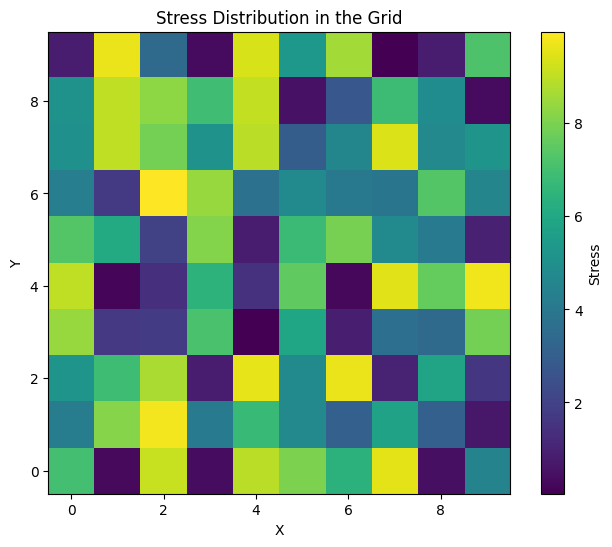

In [ ]:
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.space import MultiGrid
from mesa.time import SimultaneousActivation
from mesa.datacollection import DataCollector
import numpy as np

class StructuralAgent(Agent):
    def __init__(self, unique_id, model, material_properties, dimensions):
        super().__init__(unique_id, model)
        self.material_properties = material_properties
        self.dimensions = dimensions
        self.stress = 0
        self.strain = 0

    def step(self):
        # Placeholder calculations for demonstration
        # You need to replace these with actual calculations
        self.stress = np.random.uniform(0, 10)
        self.strain = self.stress / 2  # Simple linear relationship for demonstration

class StructuralModel(Model):
    def __init__(self, width, height, material_properties, dimensions):
        super().__init__()
        self.grid = MultiGrid(width, height, True)
        self.schedule = SimultaneousActivation(self)
        self.material_properties = material_properties
        self.dimensions = dimensions

        # Create agents representing structural components
        for x in range(width):
            for y in range(height):
                agent = StructuralAgent((x, y), self, material_properties, dimensions)
                self.grid.place_agent(agent, (x, y))
                self.schedule.add(agent)

    def step(self):
        self.schedule.step()

    def collect_data(self):
        agent_stresses = [agent.stress for agent in self.schedule.agents]
        average_stress = np.mean(agent_stresses)
        return {
            'average_stress': average_stress,
        }

# Define material properties and dimensions
material_properties = {
    'elastic_modulus': 200000,  # Example value for Young's modulus in MPa
    'yield_strength': 250,       # Example value for yield strength in MPa
}

dimensions = {
    'width': 10,   # Example dimensions of the building grid
    'height': 10,
}

# Set number of simulation steps
num_steps = 100

# Create the model
model = StructuralModel(dimensions['width'], dimensions['height'], material_properties, dimensions)

# Create a data collector
data_collector = DataCollector(model_reporters={"average_stress": lambda model: model.collect_data()['average_stress']})

# Run the model
for i in range(num_steps):
    model.step()
    data_collector.collect(model)

# Retrieve collected data
model_data = data_collector.get_model_vars_dataframe()

# Print or visualize the collected data
print(model_data.head())

# Retrieve collected data
model_data = data_collector.get_model_vars_dataframe()

# Convert the stress data to a 2D array for visualization
stress_grid = np.zeros((dimensions['height'], dimensions['width']))
for agent in model.schedule.agents:
    x, y = int(agent.pos[0]), int(agent.pos[1])  # Convert agent position to integers
    stress_grid[y, x] = agent.stress  # Assign stress value to corresponding grid cell

# Plot the stress distribution
plt.figure(figsize=(8, 6))
plt.imshow(stress_grid, cmap='viridis', origin='lower')
plt.colorbar(label='Stress')
plt.title('Stress Distribution in the Grid')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(visible=False)
plt.show()

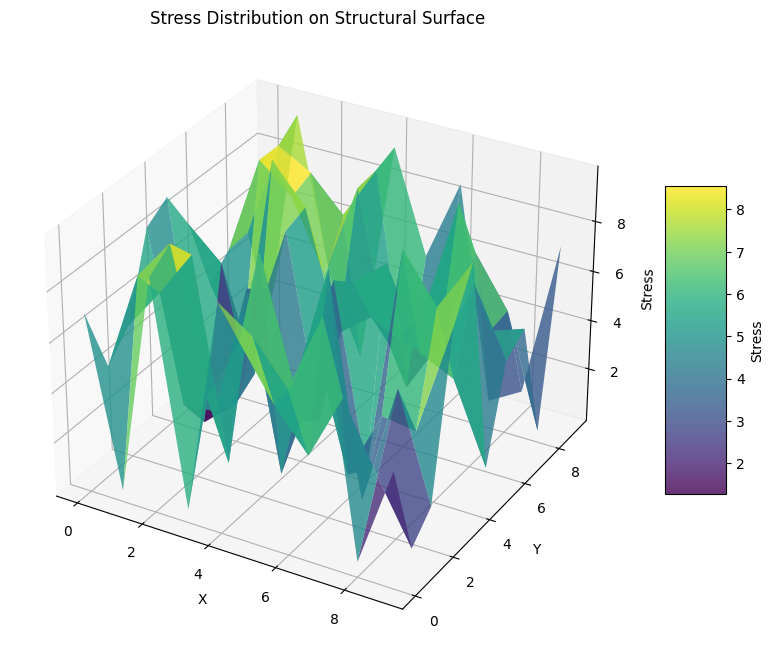

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid
X, Y = np.meshgrid(np.arange(dimensions['width']), np.arange(dimensions['height']))

# Plot the surface mesh
surf = ax.plot_surface(X, Y, stress_grid, cmap=cm.viridis, alpha=0.8)

# Add colorbar
fig.colorbar(surf, shrink=0.5, aspect=5, label='Stress')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Stress')
ax.set_title('Stress Distribution on Structural Surface')

plt.show()



Creating a Mesa agent-based model for mapping the terrain of celestial bodies like moons or asteroids involves simulating the movement of agents (representing sensors or probes) across the surface of the celestial body to collect data. Here's a general outline of how you might approach building such a model using the Mesa library in Python:

***Define Agents:*** Each agent represents a sensor or probe that moves across the surface of the celestial body. Agents should have attributes such as position, movement capabilities, and the ability to collect data about the terrain.

***Define Environment:*** Create a grid-based environment representing the surface of the celestial body. The grid cells represent different locations on the surface, and agents move between these cells to collect data.

***Define Rules for Movement:*** Specify how agents move across the surface of the celestial body. This could involve simple movement rules based on neighboring cells or more complex pathfinding algorithms.

***Terrain Generation:*** Generate terrain data for the celestial body, including features such as mountains, craters, and valleys. This terrain data can be used to initialize the grid environment.

***Data Collection:*** Define how agents collect data about the terrain as they move across the surface. This could involve sampling elevation, temperature, composition, or other properties at each location.

***Visualization:*** Use visualization tools to display the terrain data collected by agents, allowing for the visualization of the celestial body's surface features.

In [ ]:
from mesa import Agent, Model
from mesa.space import MultiGrid
from mesa.time import RandomActivation
import numpy as np

class SensorAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.data_collected = []

    def move(self):
        # Define movement rules (e.g., random movement)
        possible_moves = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_moves)
        self.model.grid.move_agent(self, new_position)

    def collect_data(self):
        # Collect terrain data at current position (e.g., elevation)
        terrain_data = self.model.terrain_map[self.pos]
        self.data_collected.append(terrain_data)

class CelestialBodyModel(Model):
    def __init__(self, width, height, terrain_map):
        super().__init__()
        self.grid = MultiGrid(width, height, torus=True)
        self.schedule = RandomActivation(self)
        self.terrain_map = terrain_map

        # Create sensor agents
        for i in range(10):  # Example: 10 sensor agents
            agent = SensorAgent(i, self)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(agent, (x, y))
            self.schedule.add(agent)

        # Initialize steps counter
        self._steps = 0

    def step(self):
        self.schedule.step()
        self._steps += 1  # Increment steps counter


# Generate terrain map (example)
width, height = 50, 50
terrain_map = np.random.rand(width, height)  # Example: Random terrain data

# Create and run the model
model = CelestialBodyModel(width, height, terrain_map)
for i in range(100):  # Example: 100 simulation steps
    model.step()

# Access collected data from sensor agents
for agent in model.schedule.agents:
    print("Sensor Agent:", agent.unique_id)
    print("Data Collected:", agent.data_collected)


Sensor Agent: 9
Data Collected: []
Sensor Agent: 1
Data Collected: []
Sensor Agent: 0
Data Collected: []
Sensor Agent: 5
Data Collected: []
Sensor Agent: 4
Data Collected: []
Sensor Agent: 3
Data Collected: []
Sensor Agent: 6
Data Collected: []
Sensor Agent: 7
Data Collected: []
Sensor Agent: 2
Data Collected: []
Sensor Agent: 8
Data Collected: []


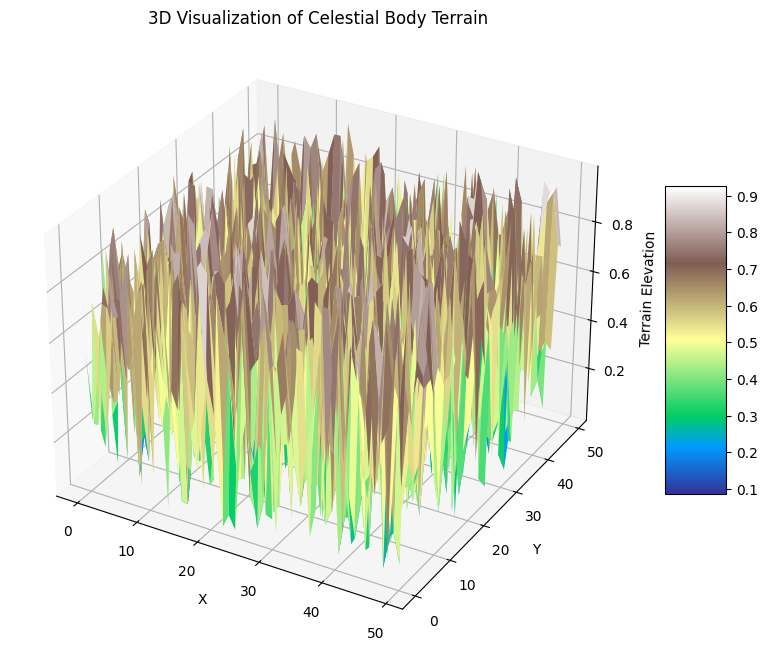

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for 3D plotting
X, Y = np.meshgrid(np.arange(width), np.arange(height))

# Plot the terrain map
surf = ax.plot_surface(X, Y, terrain_map, cmap='terrain')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Terrain Elevation')
ax.set_title('3D Visualization of Celestial Body Terrain')

# Add colorbar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
